<a href="https://colab.research.google.com/github/SarahSouzaPontes/regressaoLogistica_KNN_ArvoresDecisao/blob/main/RegressaoLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importacao 
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)


##REGRESSÃO LOGISTICA



In [15]:
#mise un place
dados ['smoker'] = dados ['smoker'].map({'yes': 1, 'no': 0})
dados [ 'charges'] = dados['charges']/1000
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

#separacao de variaveis preditoras e variável resposta
X = dados [['bmi', 'charges']]
y = dados['smoker']


Upgrade na tecnica de validação K-FOLD

In [16]:
#configuração da validação

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

validacao = KFold(n_splits = 10, shuffle = True)



In [17]:
#regressao logistica
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
reglog


{'fit_time': array([0.02189875, 0.01054311, 0.01500964, 0.01044798, 0.01098251,
        0.0102458 , 0.01097226, 0.01013589, 0.01044512, 0.01093006]),
 'score_time': array([0.00187659, 0.00594497, 0.00173736, 0.00172567, 0.00172257,
        0.00171876, 0.00173187, 0.00171995, 0.0017302 , 0.00169802]),
 'test_score': array([0.91791045, 0.92537313, 0.95522388, 0.90298507, 0.95522388,
        0.95522388, 0.92537313, 0.91791045, 0.91729323, 0.96240602])}

In [18]:
reglog['test_score']

array([0.91791045, 0.92537313, 0.95522388, 0.90298507, 0.95522388,
       0.95522388, 0.92537313, 0.91791045, 0.91729323, 0.96240602])

In [19]:
reglog['test_score'].mean()

0.9334923128717316

In [21]:
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = [ 'accuracy', 'recall', 'precision'])

print ('  Acurácia:', round(reglog['test_accuracy'].mean(), 4))

print ('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
#tx de acerto

print ('  Precisão:', round(reglog['test_precision'].mean(), 4))
#quando fala que é acerta 83%

  Acurácia: 0.9342
Sensibilidade: 0.8023
  Precisão: 0.8637


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


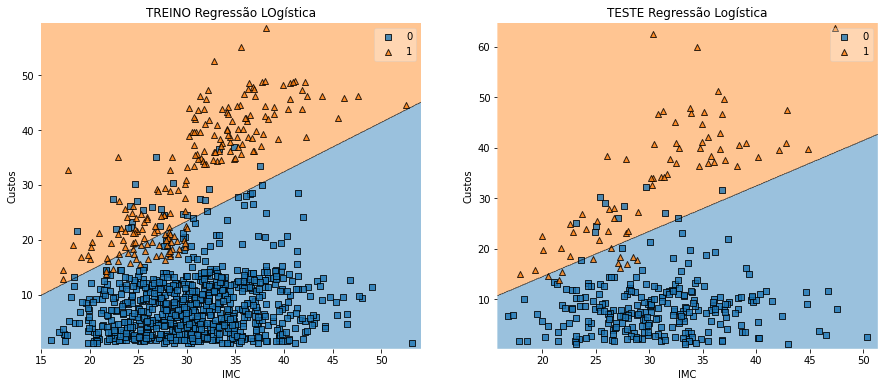

In [30]:
#regiao de decisao

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

Xtreino, Xteste, ytreino, yteste = train_test_split(X,y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')


plt.subplot(1,2,2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')


plt.show()


In [33]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

k = 7
modelo = KNeighborsClassifier(n_neighbors = k)
knn = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

print ('  Acurácia:', round(knn['test_accuracy'].mean(), 4))

print ('Sensibilidade:', round(knn['test_recall'].mean(), 4))


print ('  Precisão:', round(knn['test_precision'].mean(), 4))

  Acurácia: 0.9566
Sensibilidade: 0.9407
  Precisão: 0.8515


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


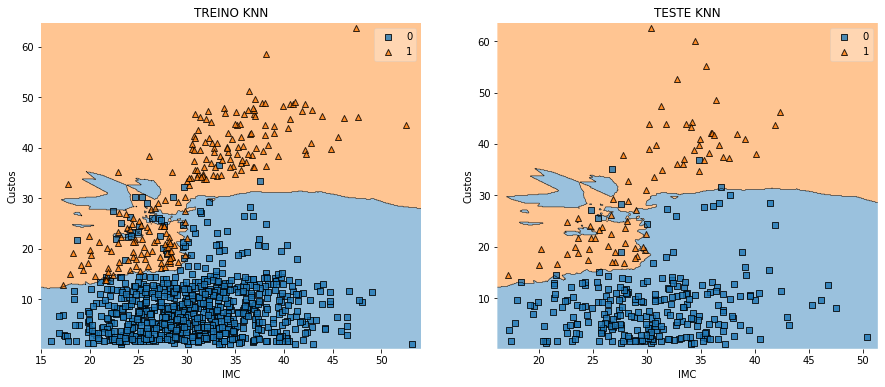

In [35]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X,y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO KNN')


plt.subplot(1,2,2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE KNN')


plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier

profundidade = 3
amostra_minima = 20
modelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split = amostra_minima)
arvore = cross_validate(modelo, X, y, cv = validacao, scoring = [ 'accuracy', 'recall', 'precision'])


print ('  Acurácia:', round(arvore['test_accuracy'].mean(), 4))

print ('Sensibilidade:', round(arvore['test_recall'].mean(), 4))


print ('  Precisão:', round(arvore['test_precision'].mean(), 4))


  Acurácia: 0.9604
Sensibilidade: 0.959
  Precisão: 0.8647


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


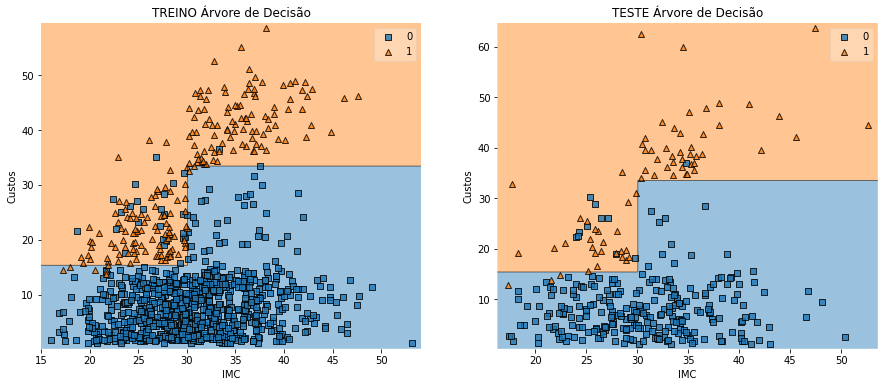

In [40]:
#regiao de decisao
Xtreino, Xteste, ytreino, yteste = train_test_split(X,y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Árvore de Decisão')


plt.subplot(1,2,2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Árvore de Decisão')


plt.show()

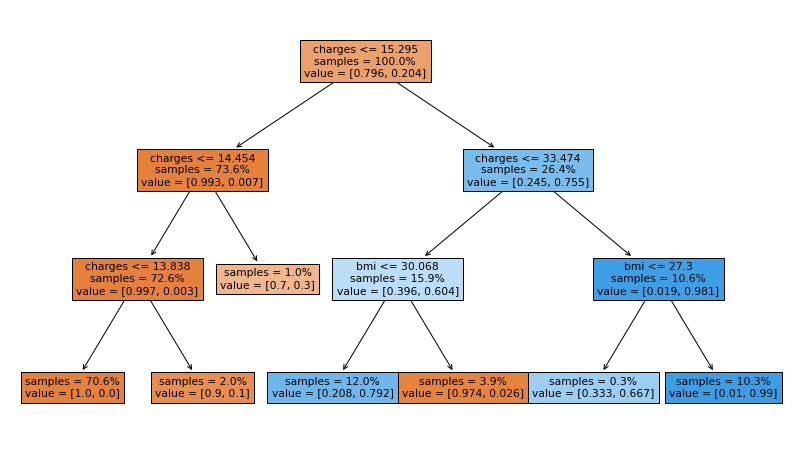

In [41]:
#plot da árvore

from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(modelo, filled = True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()

In [43]:
#comparacao dos modelos 
from sklearn.tree import DecisionTreeClassifier

profundidade = 5
amostra_minima = 20
modelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split = amostra_minima)
arvore = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])


print ('  Acurácia:', round(arvore['test_accuracy'].mean(), 4))

print ('Sensibilidade:', round(arvore['test_recall'].mean(), 4))


print ('  Precisão:', round(arvore['test_precision'].mean(), 4))

# de 3 para 5 caiu --> perdendo performace

  Acurácia: 0.9484
Sensibilidade: 0.8928
  Precisão: 0.8554


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


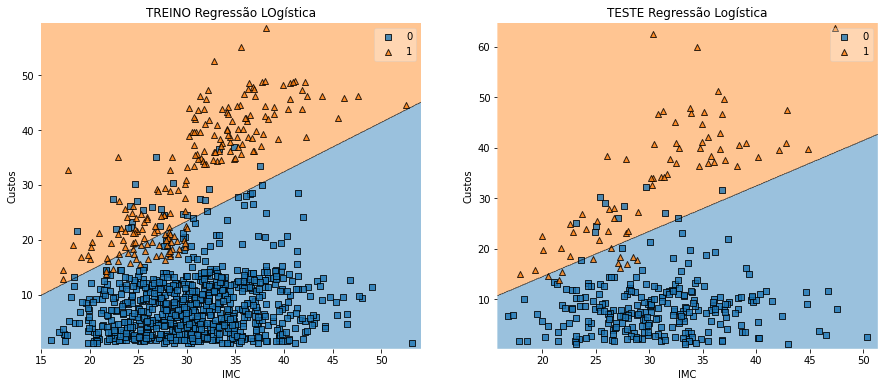

In [ ]:
#regiao de decisao

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

Xtreino, Xteste, ytreino, yteste = train_test_split(X,y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')


plt.subplot(1,2,2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')


plt.show()


In [57]:
modelos = [LogisticRegression(),
           KNeighborsClassifier(n_neighbors= 5),
           KNeighborsClassifier(n_neighbors= 15),
           KNeighborsClassifier(n_neighbors= 25),
           KNeighborsClassifier(n_neighbors= 35),
           KNeighborsClassifier(n_neighbors= 45),
           DecisionTreeClassifier(max_depth= 1),
           DecisionTreeClassifier(max_depth= 2),
           DecisionTreeClassifier(max_depth= 3),
           DecisionTreeClassifier(max_depth= 4),
           DecisionTreeClassifier(max_depth= 5)]


nomes = ['Regressao Logistica',
         'KNN - K = 5',
         'KNN - K = 15',
         'KNN - K = 25',
         'KNN - K = 35',
         'KNN - K = 45',
         'ÁRVORE  - PROF 1',
         'ÁRVORE  - PROF 2',
         'ÁRVORE  - PROF 3',
         'ÁRVORE  - PROF 4',
         'ÁRVORE  - PROF 5']



accs = []
sens = []
vpps = []

for modeli in modelos :
  resultados = cross_validate(modelo, X, y, cv = validacao, scoring = [ 'accuracy', 'recall', 'precision'])
  accs.append(resultados['test_accuracy'].mean())
  sens.append(resultados['test_recall'].mean())
  vpps.append(resultados['test_precision'].mean())


aux = {'Acurácia': accs, 'Sensibilidade': sens, 'Precisão': vpps}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'Acurácia', ascending = False).round(4)

,Acurácia,Sensibilidade,Precisão
KNN - K = 35,0.9559,0.9148,0.8774
ÁRVORE - PROF 5,0.9544,0.9256,0.8633
ÁRVORE - PROF 2,0.9537,0.9251,0.8652
ÁRVORE - PROF 1,0.9529,0.9113,0.8582
ÁRVORE - PROF 4,0.9522,0.8983,0.8734
KNN - K = 5,0.9507,0.8979,0.8654
KNN - K = 25,0.9507,0.8914,0.8618
KNN - K = 45,0.9499,0.9019,0.8656
Regressao Logistica,0.9492,0.8945,0.8691
KNN - K = 15,0.9492,0.8933,0.8589
